In [250]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
def f(x):
    return 3*x**2 - 4*x +5

In [252]:
f(3.0)

20.0

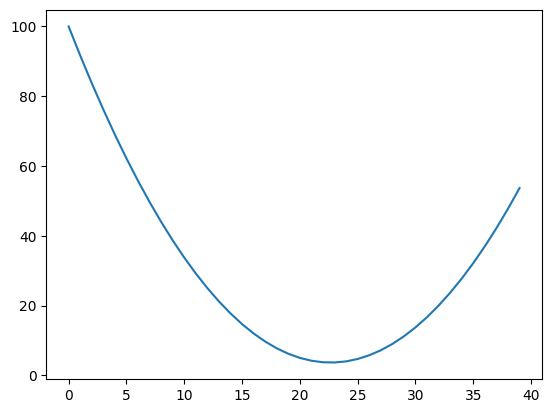

In [253]:
xs = np.arange(-5,5,.25)
ys = f(xs)
plt.plot(ys)

In [254]:
# slope
h = .0001
x = 3.0
(f(x+h) - f(x))/h

14.000300000063248

In [255]:
h = .0001
x = 2/3
(f(x+h) - f(x))/h

0.0002999999981767587

In [256]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [257]:
h = .0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print(f'd1 : {d1}')
print(f'd2 : {d2}')
print('slope : ',(d2-d1)/h)

d1 : 4.0
d2 : 3.999699999999999
slope :  -3.000000000010772


In [258]:
# DS
class Value:
    def __init__(self,data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data)
    
    def __mul__(self,other):
        return Value(self.data * other.data)

In [259]:
a = Value(2)
a

Value(data=2)

In [260]:
type(a)

__main__.Value

In [261]:
b = Value(-3)
b

Value(data=-3)

In [262]:
a + b

Value(data=-1)

In [263]:
a * b

Value(data=-6)

In [264]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a*b + c

Value(data=4.0)

In [265]:
# DS
class Value:
    def __init__(self,data,_children= ()):
        self.data = data
        self._prev = set(_children)
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other))
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other))

In [266]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [267]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [268]:
# DS
class Value:
    def __init__(self,data,_children= (),_op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')

In [269]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [270]:
d._op

'+'

In [271]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f}" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

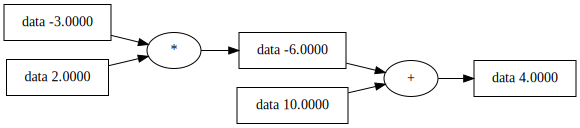

In [272]:
draw_dot(d)

# lets add another label

In [273]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')

In [274]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')

d = a*b + c
d.label = 'd'
d

Value(data=4.0)

In [275]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

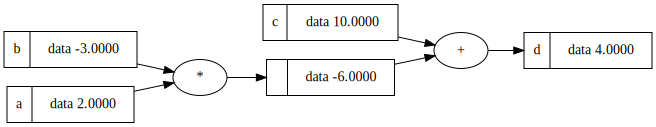

In [276]:
draw_dot(d)

# lets add some depth to the same operation

In [277]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')

d = a*b + c
d.label = 'd'


f = Value(-2.0,label='f')

L = d * f;L.label = 'L'
L

Value(data=-8.0)

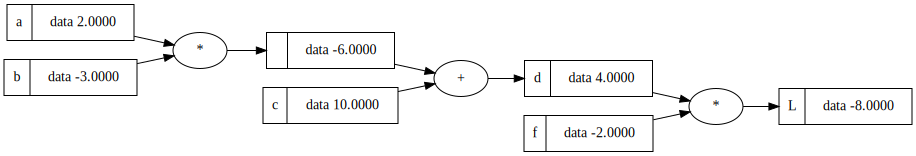

In [278]:
draw_dot(L)

# lets add another variable/ label grad that will show us the gradient w.r.t. L for every node

In [279]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data , n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


a = Value(2.0,label='a')
b = Value(-3.0,label='b')

e = a*b ; e.label='e'
c = Value(10.0,label='c')

d = e + c
d.label = 'd'


f = Value(-2.0,label='f')

L = d * f;L.label = 'L'
L

Value(data=-8.0)

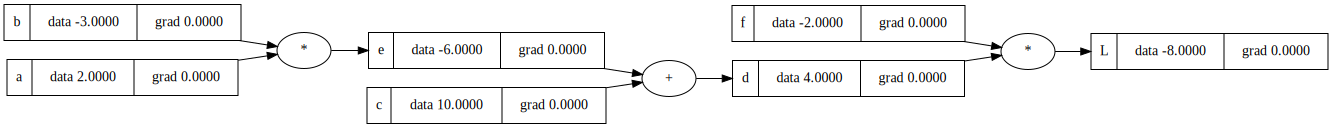

In [280]:
draw_dot(L)

In [281]:
# manually calculating the grads
L.grad = 1
d.grad = -2.0
f.grad = 4
c.grad = -2
e.grad = -2
b.grad = -4
a.grad  = 6

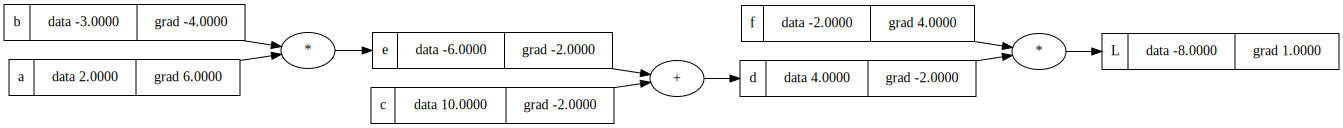

In [282]:
draw_dot(L)

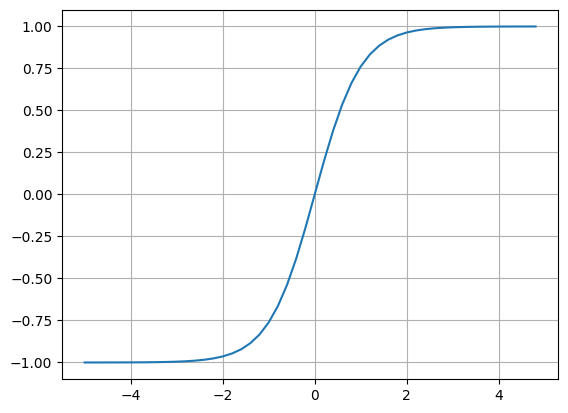

In [283]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2))); plt.grid()

# Lets build this neuron

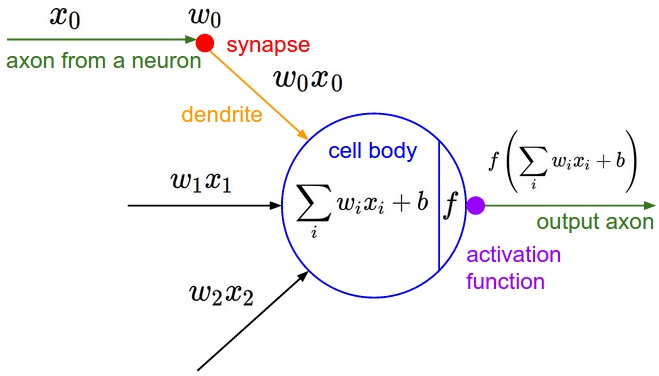

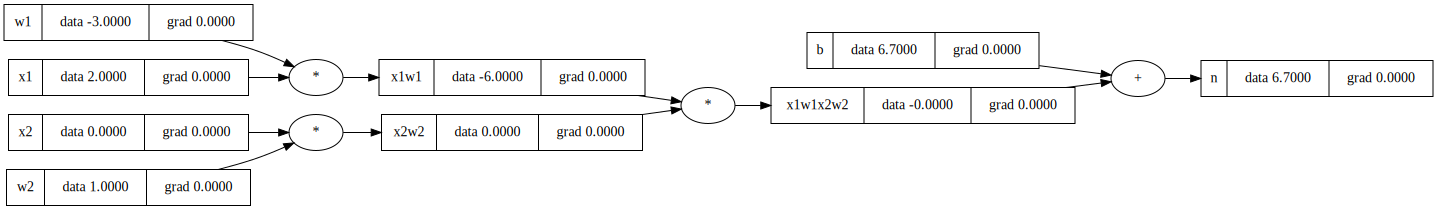

In [284]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.7,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 * x2w2;x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b;n.label = 'n'

draw_dot(n)

# now to add the tanh activation we need to change the class as tanh is hyperbolic meaning that it can't be reached using just add and multiply

In [285]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data,(self,other),'*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1) / (math.exp(2*x)+ 1)
        out = Value(t,(self,),'tanh')
        return out

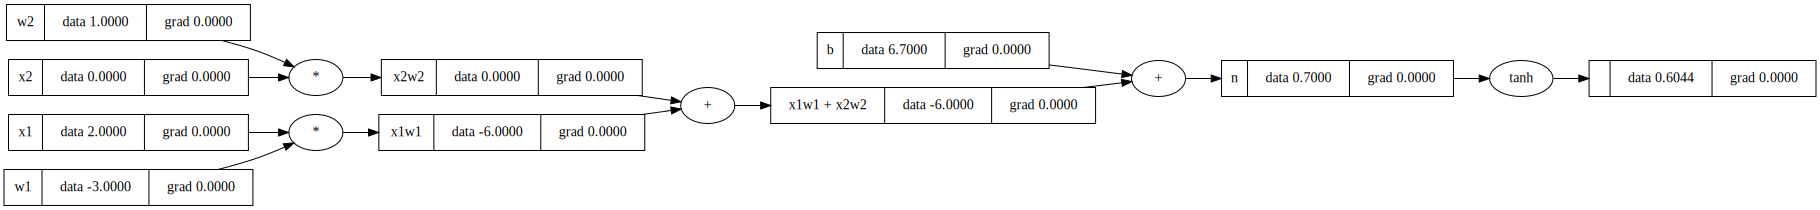

In [286]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.7,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh()
draw_dot(o)

In [287]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh();o.label = 'o'

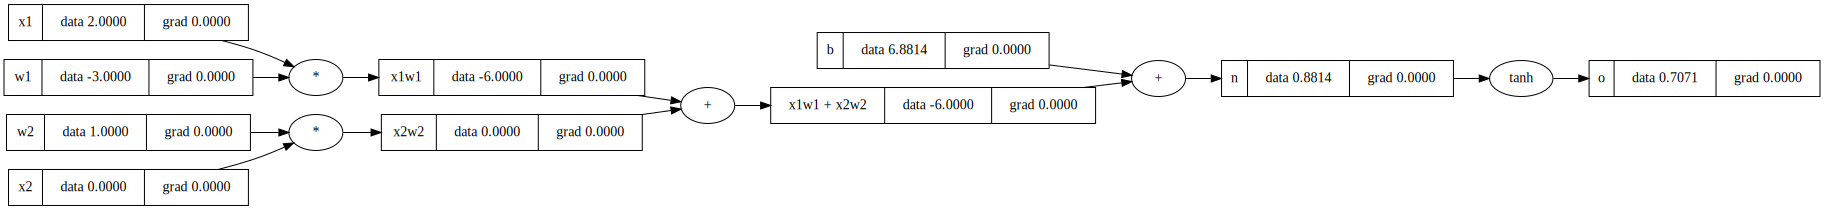

In [288]:
draw_dot(o)

In [289]:
o.grad = 1.0

In [290]:
# o=tanh(n)
# do/dn = 1 - tanh^2(n)
# do/dn = 1 - o**2

In [291]:
1 - o.data **2 # this will be the grad of n

0.4999999999999999

In [292]:
n.grad=.5

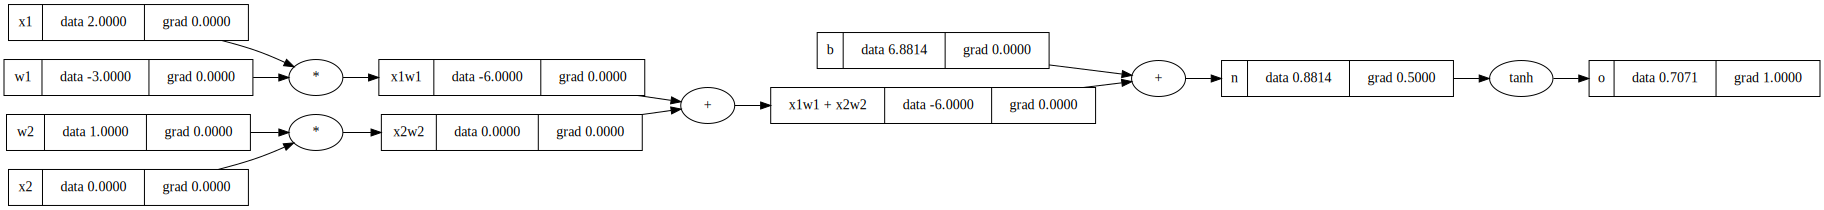

In [293]:
draw_dot(o)

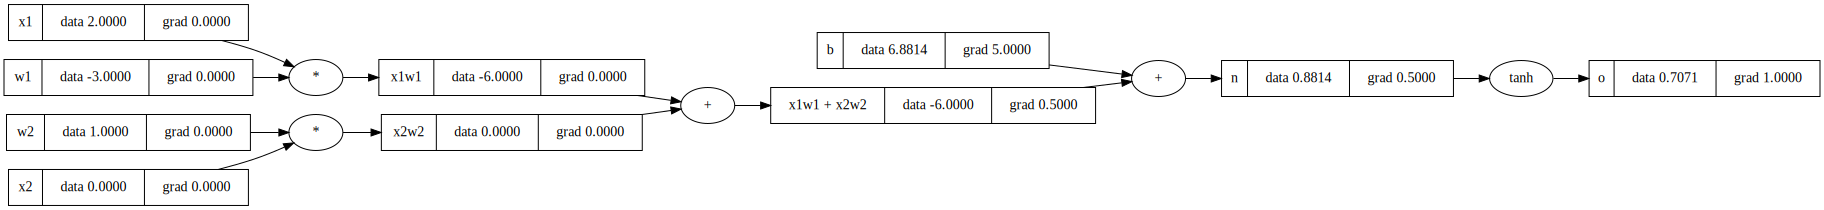

In [294]:
x1w1x2w2.grad = .5
b.grad = 5
draw_dot(o)

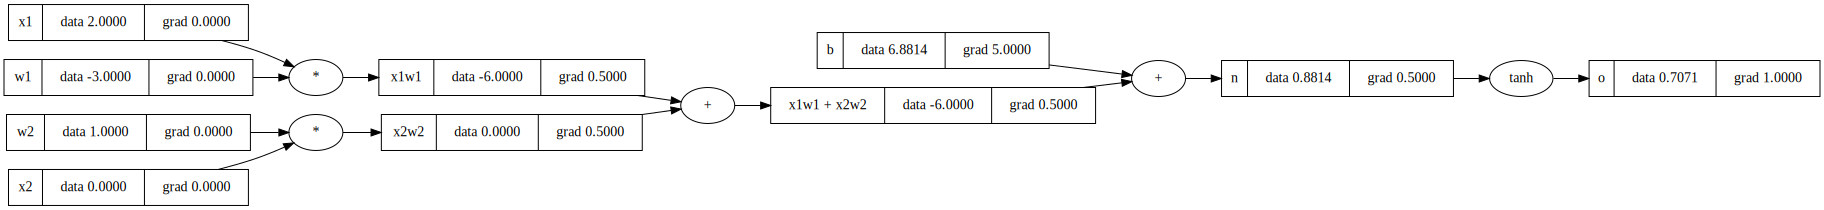

In [295]:
x1w1.grad = .5
x2w2.grad = .5
draw_dot(o)

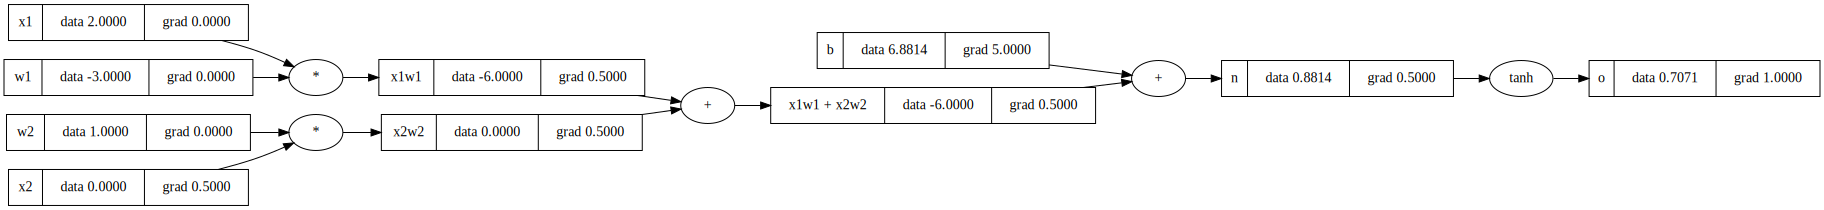

In [296]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

draw_dot(o)

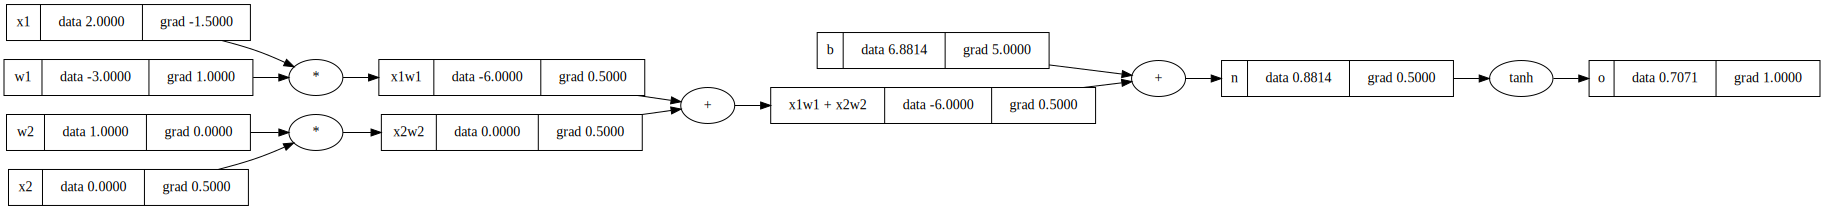

In [297]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

draw_dot(o)

In [298]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda :None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        
        def _backward():
            self.grad = other.data * out.grad # chain's rule
            other.grad = self.data * out.grad # chain's rule
            
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1) / (math.exp(2*x)+ 1)
        out = Value(t,(self,),'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad # chain's rule
                
        out._backward = _backward
        return out

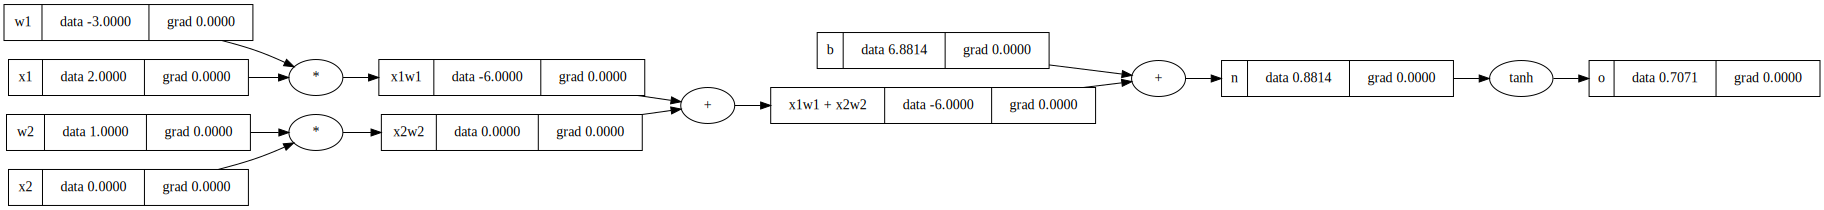

In [299]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh();o.label = 'o'
draw_dot(o)

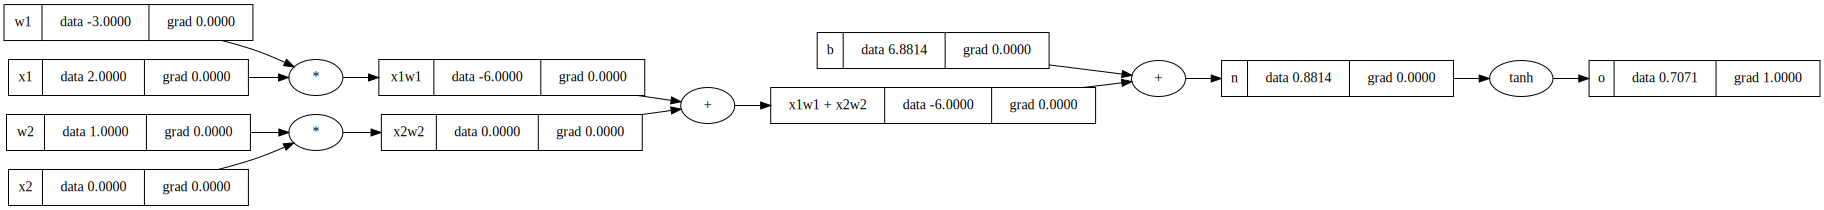

In [300]:
o.grad = 1
draw_dot(o)

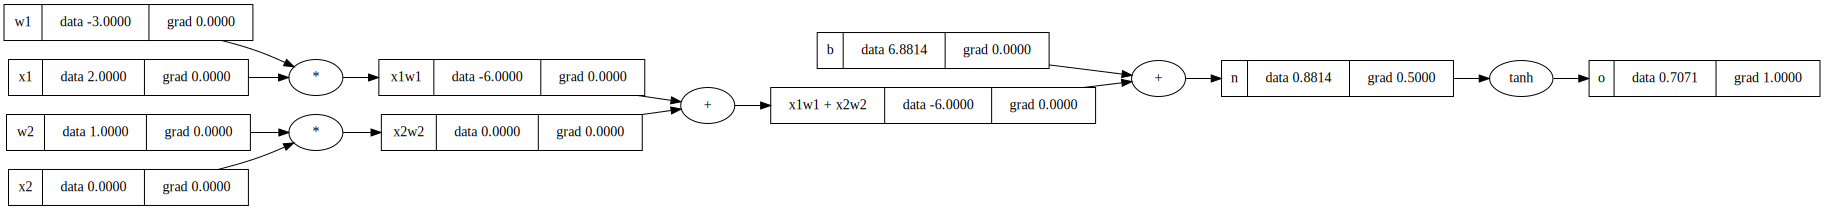

In [301]:
o._backward()
draw_dot(o)

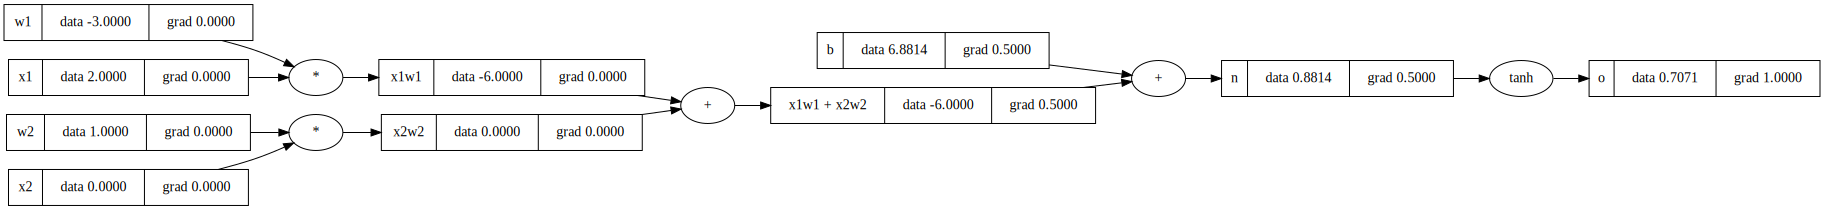

In [302]:
n._backward()
draw_dot(o)

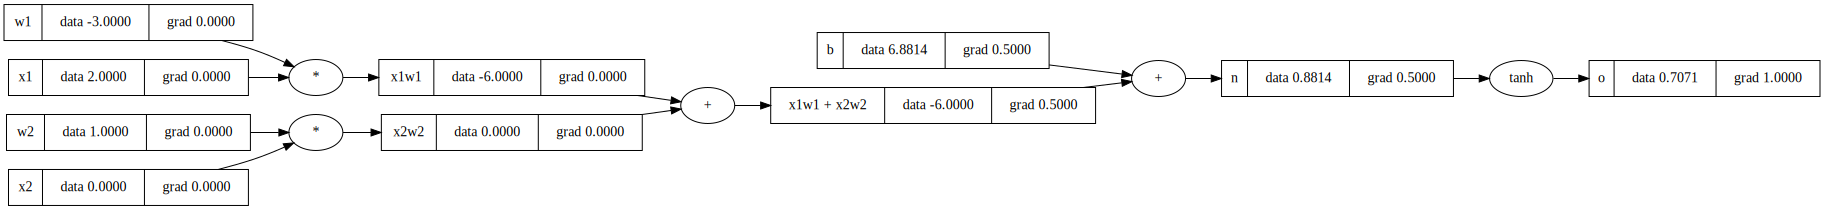

In [303]:
b._backward()
draw_dot(o)

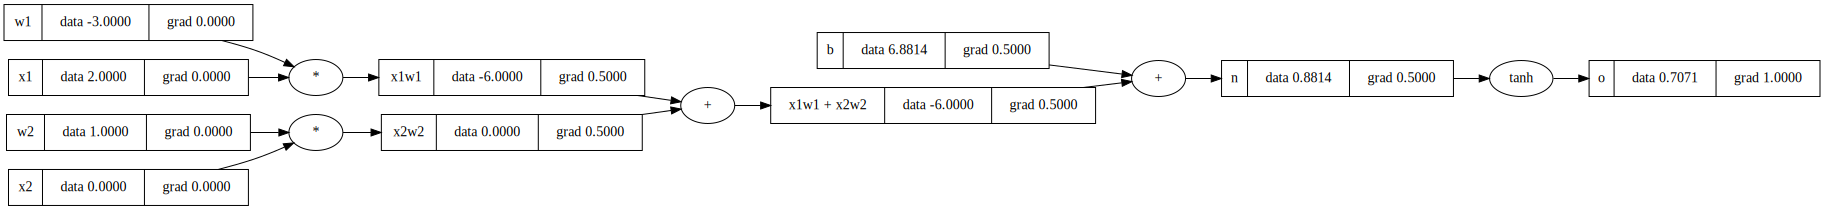

In [304]:
x1w1x2w2._backward()
draw_dot(o)

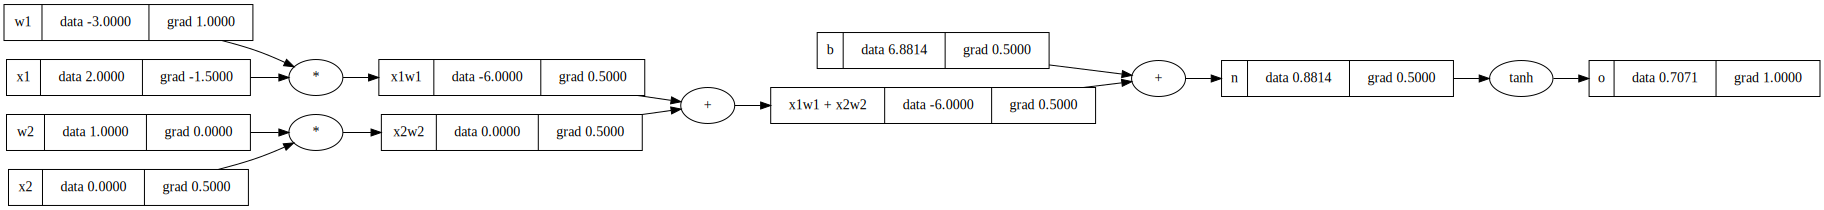

In [305]:
x2w2._backward()
x1w1._backward()
draw_dot(o)

In [306]:
topo= []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

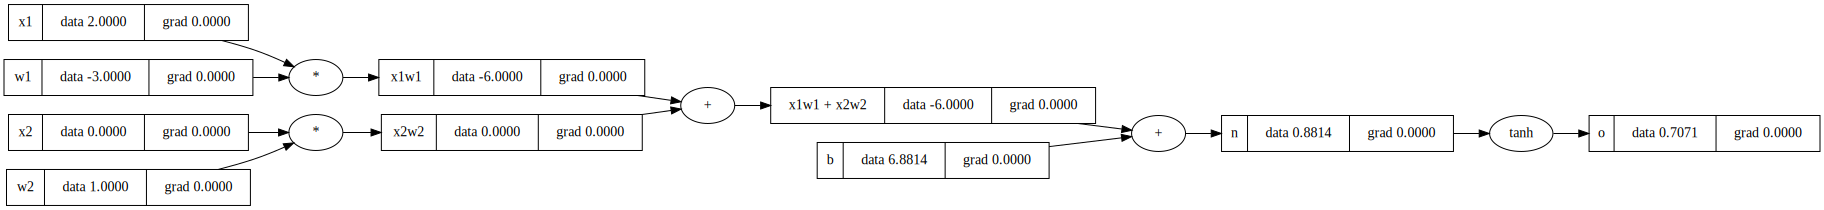

In [307]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh();o.label = 'o'
draw_dot(o)

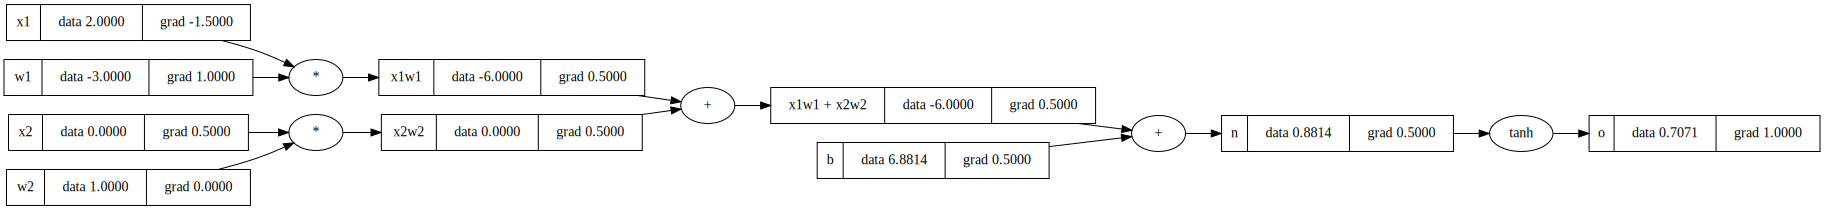

In [308]:
o.grad = 1

topo= []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()
    
draw_dot(o)

# building the backward prop function

In [309]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda :None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        
        def _backward():
            self.grad = other.data * out.grad # chain's rule
            other.grad = self.data * out.grad # chain's rule
            
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1) / (math.exp(2*x)+ 1)
        out = Value(t,(self,),'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad # chain's rule
                
        out._backward = _backward
        return out
    
    def backward(self):
        topo= []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):
            node._backward()

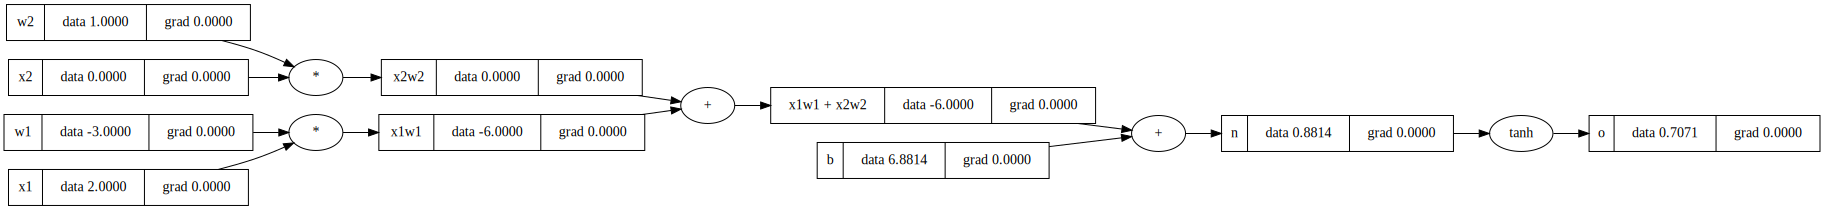

In [310]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh();o.label = 'o'
draw_dot(o)

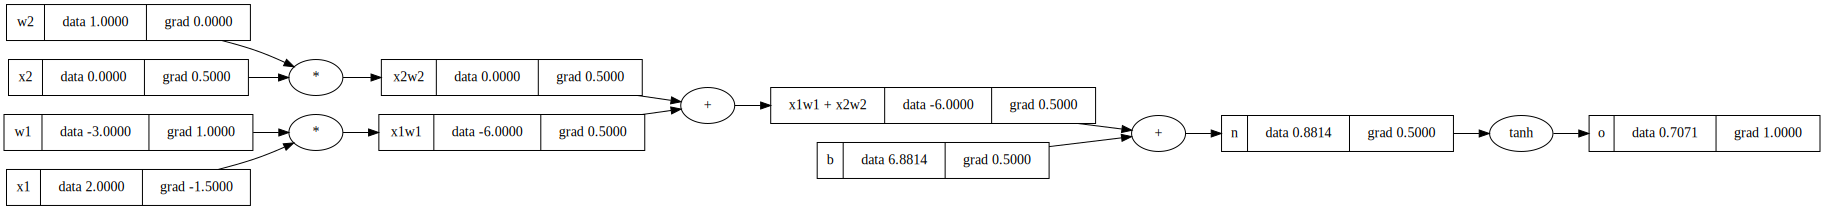

In [311]:
o.backward()
draw_dot(o)

# there is a bug in the code that we haven't encountered yet

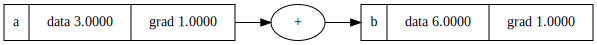

In [312]:
a= Value(3.0,label='a')
b = a+a ;b.label='b'
b.backward()
draw_dot(b)

### here the data is correct but the gradient is not! the grad should be 2
### the issue is we will encounter this issue anytime we use a variable more than once.

In [313]:
# DS
class Value:
    def __init__(self,data,_children= (),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda :None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other = other if isinstance (other,Value) else Value(other)
        out = Value(self.data + other.data,(self,other),'+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __radd__(self,other):
        return self + other
    
    def __mul__(self,other):
        other = other if isinstance (other,Value) else Value(other)
        out = Value(self.data * other.data,(self,other),'*')
        
        def _backward():
            self.grad += other.data * out.grad # chain's rule
            other.grad += self.data * out.grad # chain's rule
            
        out._backward = _backward
        return out
    
    def __rmul__(self,other):
        return self * other
    
    def __truediv__(self,other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self,other):
        return self + (-other)
    
    def __pow__(self,other):
        assert isinstance(other,(int,float)),"only supporting int and float for now"
        out = Value(self.data**other,(self,),f'**{other}')
        
        def _backward():
            self.grad += other * (self.data**(other-1)) * out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1) / (math.exp(2*x)+ 1)
        out = Value(t,(self,),'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # chain's rule
                
        out._backward = _backward
        return out
    
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x) , (self,) , 'exp')
    
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
    
        return out
    
    def backward(self):
        topo= []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):
            node._backward()

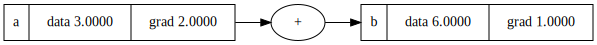

In [314]:
a= Value(3.0,label='a')
b = a+a ;b.label='b'
b.backward()
draw_dot(b)

In [315]:
# this dosent work with class int
a = Value(3)
a + 1

Value(data=4)

In [316]:
a*2

Value(data=6)

In [317]:
2 * a

Value(data=6)

In [318]:
a = Value(2,'a')
b = Value(4,'b')
# a/b

In [319]:
a-b

Value(data=-2)

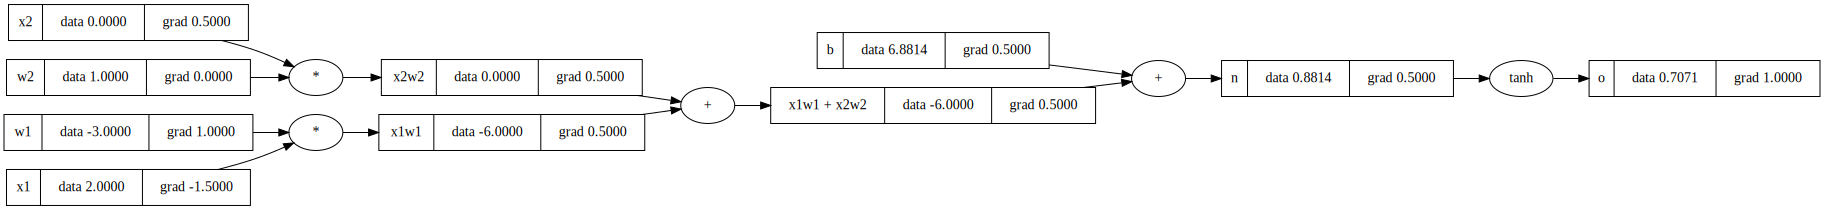

In [320]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

o = n.tanh();o.label = 'o'
o.backward()
draw_dot(o)

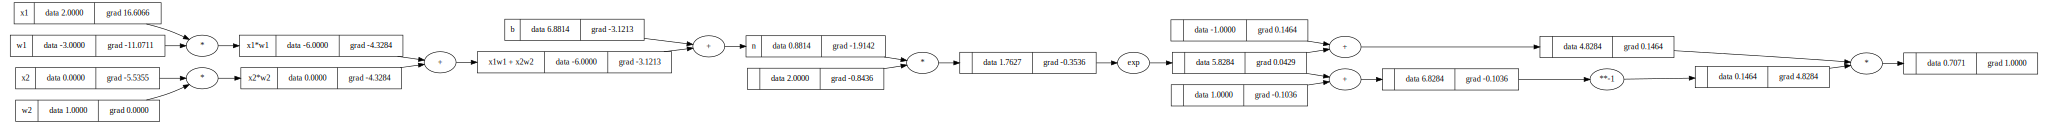

In [321]:
# inputs
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

# weights
w1 = Value(-3,label='w1')
w2 = Value(1.0,label='w2')


# bias of the neuron
b = Value(6.8813735870195432,label='b')

x1w1 = x1*w1 ;x1w1.label = 'x1*w1'
x2w2 = x2*w2 ;x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b;n.label = 'n'

# -------------
e = (2*n).exp()
o = (e-1) / (e+1)
# ---------------------

o.backward()
draw_dot(o)


# Doing the same with torch

In [322]:
import torch 

x1 = torch.tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.tensor([1.0]).double() ; w2.requires_grad = True

b = torch.tensor([6.8813735870195432]).double() ; b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()
print('-----')

print('x2',x2.grad.item())
print('w2',w2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())


0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [323]:
import random
class Neuron:
    def __init__(self,nin): 
        '''
        nin : no. of inputs
        '''
        self.w = [Value(random.uniform(-1,1)) for i in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self,x):
        #  w*x +b
        z = (sum([wi*xi for wi,xi in zip(self.w,x)],self.b))
        op = z.tanh()
        return op
    
    def parameters(self):
        return self.w + [self.b]
    
    
class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for i in range(nout)]
        
    def __call__(self,x):
        z = [n(x) for n in self.neurons]
        return z
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters
        #     params.extend(ps)
            
        # return params
        
        
class MLP:
    def __init__(self,nin,nouts): 
        """
        nin is the no of the inputs 
        and nouts is the list of layers with thier respective no. of neurons in them
        """
        self.sz = [nin] + nouts
        self.layers = [Layer(self.sz[i] , self.sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x[0] if len(x) == 1 else x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [324]:
n = MLP(nin=3, nouts=[4,4,1])

In [325]:
# data
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]

# label
ys = [1.0,-1.0,-1.0,1.0] # desired targets

In [326]:
y_pred = [n(x) for x in xs]
y_pred

[Value(data=-0.5400948645137911),
 Value(data=0.5145299433772758),
 Value(data=-0.19652689743465077),
 Value(data=-0.4474175791511102)]

In [327]:
# mean squared error
loss = sum([(ypred - ygt)**2 for ygt , ypred in zip(ys,y_pred)])
loss

Value(data=7.406279816069776)

In [328]:
loss.backward()

In [329]:
n.layers[0].neurons[0].w[0]

Value(data=-0.30231540555624337)

In [330]:
# draw_dot(loss)

In [331]:
n.parameters()

[Value(data=-0.30231540555624337),
 Value(data=0.764392411707393),
 Value(data=-0.3338747265029838),
 Value(data=-0.28205147705405165),
 Value(data=-0.22149744866628063),
 Value(data=0.9873336950951646),
 Value(data=0.30171543979736093),
 Value(data=0.14560328786784416),
 Value(data=0.5932182769720993),
 Value(data=-0.8730152943740326),
 Value(data=0.2382899919009973),
 Value(data=-0.12076282491495749),
 Value(data=-0.7449152099525091),
 Value(data=-0.15760252096137695),
 Value(data=0.1114568749758762),
 Value(data=0.2659478059394449),
 Value(data=0.91257734294182),
 Value(data=0.9616325806005379),
 Value(data=0.2700983297907651),
 Value(data=-0.39922361776101645),
 Value(data=-0.22305466850463618),
 Value(data=0.3883169963150843),
 Value(data=-0.24716191941769017),
 Value(data=0.30710185281362623),
 Value(data=0.4300392388988339),
 Value(data=0.15596714658919186),
 Value(data=-0.009665405541705141),
 Value(data=0.29444108755794196),
 Value(data=0.6775012056631682),
 Value(data=-0.5614

In [332]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [333]:
n.layers[0].neurons[0].w[0]

Value(data=-0.7705289621460982)

In [334]:
# calculating the loss again ; it should be a little less
y_pred = [n(x) for x in xs]
loss = sum([(ypred - ygt)**2 for ygt , ypred in zip(ys,y_pred)])
loss

Value(data=3.859394580379741)

In [335]:
for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum([(ypred - ygt)**2 for ygt , ypred in zip(ys,y_pred)])
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    #  update weights
    for p in n.parameters():
        p.data += -0.05 * p.grad    
        
    print(k+1,'\t',loss.data)

1 	 3.859394580379741
2 	 3.388929260098063
3 	 7.3758172009697205
4 	 6.85324607045818
5 	 5.289114018841723
6 	 4.302213792160274
7 	 4.245492691469539
8 	 4.229794986649716
9 	 4.178076791125868
10 	 4.156580431772637
11 	 4.087235365112287
12 	 3.2001581417926124
13 	 5.452856277301583
14 	 2.009434697004486
15 	 2.99094384372252
16 	 2.5643314343809682
17 	 0.7123161793760023
18 	 0.32407112368778845
19 	 0.25136161498467813
20 	 0.20481295750867728


In [336]:
y_pred

[Value(data=0.7604854173569154),
 Value(data=-0.7909204142220044),
 Value(data=-0.7850887410493435),
 Value(data=0.7601154448549637)]

### note: if the gradients are exploding there ma be some issue with the activation function used 
### i encounterd the same issue when the activation was just linear because i commented the activation and forgot to turn it on